In [242]:
import numpy as np
import matplotlib.pyplot as plt
import sys

%matplotlib inline

In [55]:
class Point(object):
    "A point in the plane."
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [47]:
class Distance(object):
    """Distance between two points."""
    def __init__(self, p1, p2):
        self.euclidian = self.compute_euclidian(p1, p2)
        self.manhattan = self.compute_manhattan(p1, p2)
        
    def compute_euclidian(self, p1, p2):
        return np.sqrt((p1.x - p2.x)**2 + (p1.y - p2.y)**2)
    
    def compute_manhattan(self, p1, p2):
        return np.abs(p1.x - p2.x) + np.abs(p1.y - p2.y)

In [165]:
def min_mask(matrix):
    """Return the min mask matrix of a given 2d numpy array."""
    min_mat = np.zeros(matrix.shape)
    min_mat[np.arange(matrix.shape[0]), matrix.argmin(axis=1)] = 1
    return min_mat

def min_indexes(matrix):
    return {'row_idx': np.arange(matrix.shape[0]), 'col_idx': matrix.argmin(axis=1)}

In [166]:
min_indexes(mat)

{'col_idx': array([0, 2]), 'row_idx': array([0, 1])}

In [176]:
# tests

p1 = Point(0, 1)
p2 = Point(1, 0.5)
dist = Distance(p1, p2)

def test_compute_euclidian(p1, p2):
    assert dist.euclidian == np.sqrt(5) / 2
    
def test_compute_manhattan(p1, p2):
    assert dist.manhattan == 1.5
    
    
mat = np.array([[1, 2, 3], [2, 2, 0]])
expected_min_mat = np.array([[ 1.,  0.,  0.],[ 0.,  0.,  1.]])   
expected_min_indexes = {'row_idx': np.array([0, 1]), 'col_idx': np.array([0, 2])}

def test_min_mask():
    assert (min_mask(mat) == expected_min_mat).all()
    
def test_min_indexes():
    result = min_indexes(mat)
    for key in result.keys():
        assert (expected_min_indexes[key] == result[key]).all
    
test_compute_euclidian(p1, p2)
test_compute_manhattan(p1, p2)
test_min_mask()
test_min_indexes()

In [57]:
p1 = Point(0, 1)
p2 = Point(1, 0.5)

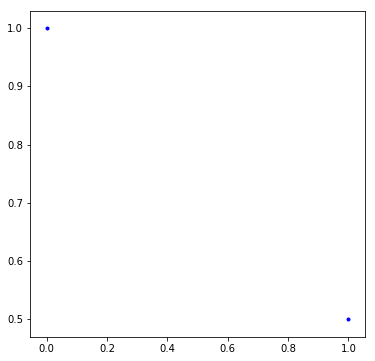

In [212]:
fig = plt.figure(figsize=(6, 6))
plt.scatter([p1.x, p2.x], [p1.y, p2.y], c='b', marker='.');

In [265]:
size = 15000
xs = np.random.random_sample(size=size)
ys = np.random.random_sample(size=size)

In [216]:
def deltas(vect):
    """Return matrix of deltas d_ij = (x_i - x_j) for all x_i, x_j in vect."""
    size = len(vect)
    return np.repeat(vect, size, axis=0).reshape((size, size)) - np.tile(vect, size).reshape((size, size))

In [241]:
def pairwise_distances_euclidean(xs, ys):
    """Return matrix of pairwise euclidean distances between points given vectors of their xs and ys"""
    return np.sqrt(deltas(xs)**2 + deltas(ys)**2)

In [240]:
def pairwise_distances_manhattan(xs, ys):
    """Return matrix of pairwise manhattan distances between points given vectors of their xs and ys"""
    return np.abs(deltas(xs)) + np.abs(deltas(ys))

In [243]:
def min_distances(xs, ys, distance='euclidean'):
    """Return the minimun distances between points and the corresponding couple of coordinates"""
    if distance == 'euclidean':
        dist_func = pairwise_distances_euclidean
    elif distance == 'manhattan':
        dist_func = pairwise_distances_manhattan
    else:
        print("{} is not an available distance".format(distance))
        sys.exit(1)
    pdists = dist_func(xs, ys)
    #replace 0's by infinity
    pdists[pdists == 0] = np.inf
    return np.min(pdists, axis=0)

In [266]:
min_dists_euclidean = min_distances(xs, ys, distance='euclidean')
min_dists_manhattan = min_distances(xs, ys, distance='manhattan')

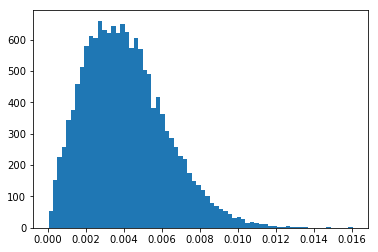

In [267]:
plt.hist(min_dists_euclidean, bins='auto');

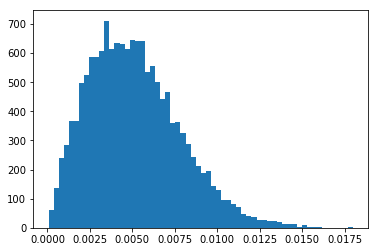

In [268]:
plt.hist(min_dists_manhattan, bins='auto');

In [275]:
size = 300
xs = np.random.random_sample(size=size)
ys = np.random.random_sample(size=size)

In [276]:
pdists_eucl = pairwise_distances_euclidean(xs, ys)
pdists_eucl[pdists_eucl == 0] = np.inf
pdists_manh = pairwise_distances_manhattan(xs, ys)
pdists_manh[pdists_manh == 0] = np.inf

In [277]:
min_ind_eucl = min_indexes(pdists_eucl)
min_ind_manh = min_indexes(pdists_manh)

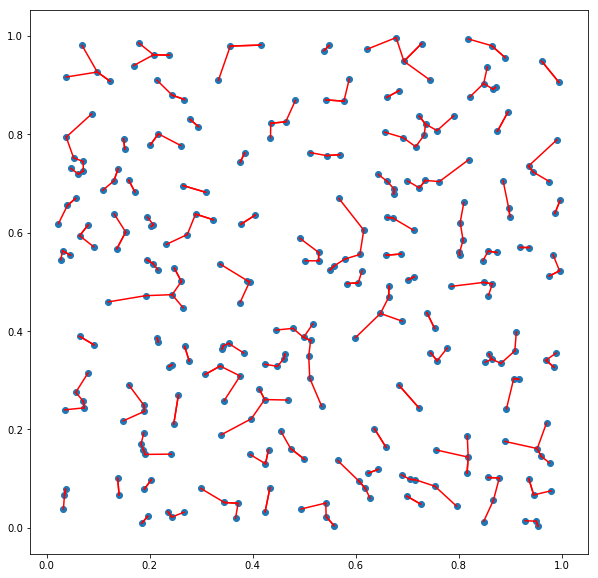

In [278]:
plt.figure(figsize=(10, 10))
plt.scatter(xs, ys)
for i in range(size):
    idx = (min_ind_eucl['row_idx'][i], min_ind_eucl['col_idx'][i])
    plt.plot(xs[[idx]], ys[[idx]], c='r')

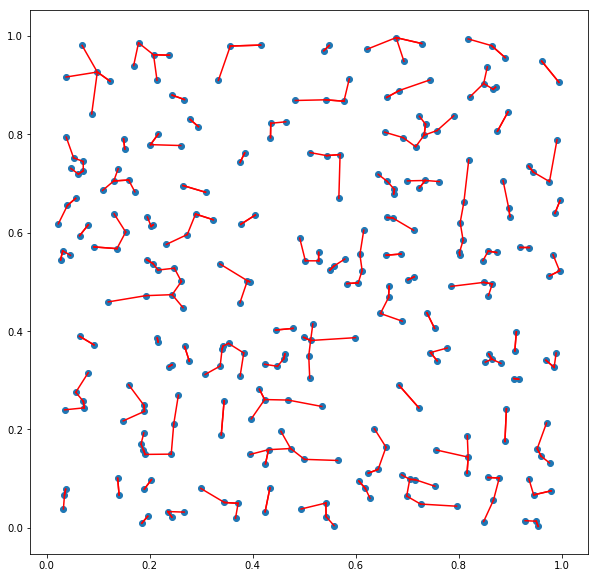

In [279]:
plt.figure(figsize=(10, 10))
plt.scatter(xs, ys)
for i in range(size):
    idx = (min_ind_manh['row_idx'][i], min_ind_manh['col_idx'][i])
    plt.plot(xs[[idx]], ys[[idx]], c='r')